# Hyperparameter tuning results

In [4]:
import sys
sys.path.append("../src")

import ray.tune
import os
root = "../models/tune/12classes"
import pandas as pd

from hyperparameter import get_model_fields

rnn_fields, _ = get_model_fields("rnn")
msresnet_fields, _ = get_model_fields("msresnet")
tempcnn_fields, _ = get_model_fields("tempcnn")
transformer_fields, _ = get_model_fields("transformer")

models = ["rnn","rnn","transformer","transformer","tempcnn","tempcnn","msresnet","msresnet"]
datasets = ["tum","gaf","tum","gaf","tum","gaf","tum","gaf"]

metrics = ["loss","accuracy","mean_accuracy","mean_recall", "mean_precision","mean_f1","kappa"]

experiments = [f"{model}_{dataset}" for model, dataset in zip(models, datasets)]

In [5]:
def get_best(experiment, fields, by="kappa", ascending=True):
    analysis = ray.tune.Analysis(os.path.join(root,experiment))
    best = analysis.dataframe().sort_values(by=by, ascending=ascending).iloc[::-1]
    best = best[[f"config/{field}" for field in fields] + metrics]
    best = best.set_index(by)
    
    fname=os.path.join(root,experiment+".csv")
    print(f"writing {fname}")
    best.to_csv(fname)
    return best


In [6]:
rnn_gaf = get_best("rnn_gaf", rnn_fields)
rnn_gaf.iloc[:3]

writing ../models/tune/12classes/rnn_gaf.csv


,config/num_layers,config/hidden_dims,config/dropout,config/weight_decay,config/learning_rate,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,,,
0.884116,3,128,0.303770,0.000019,0.005650,0.224857,0.926658,0.678848,0.678848,0.721047,0.689154
0.881652,4,256,0.312658,0.000022,0.001054,0.248436,0.925236,0.633678,0.633678,0.708479,0.652972
0.881172,5,32,0.105892,0.000042,0.002762,0.234176,0.924787,0.608522,0.608522,0.660453,0.615609


In [7]:
rnn_tum = get_best("rnn_tum", rnn_fields)
rnn_tum.iloc[:3]

writing ../models/tune/12classes/rnn_tum.csv


,config/num_layers,config/hidden_dims,config/dropout,config/weight_decay,config/learning_rate,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,,,
0.871461,2,256,0.603035,0.000011,0.000899,0.292998,0.917826,0.631828,0.631828,0.704214,0.648281
0.869550,4,32,0.229352,0.000050,0.002479,0.274980,0.916149,0.583410,0.583410,0.669283,0.600060
0.869241,2,32,0.348838,0.000025,0.004695,0.276380,0.916346,0.604828,0.604828,0.723356,0.609128


In [8]:
transformer_gaf = get_best("transformer_gaf", transformer_fields)
transformer_gaf.iloc[:3]

writing ../models/tune/12classes/transformer_gaf.csv


,config/hidden_dims,config/n_heads,config/n_layers,config/weight_decay,config/learning_rate,config/warmup,config/dropout,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,,,,,
0.903016,64,4,5,0.000260,0.000426,1000,0.014172,0.196433,0.939006,0.717118,0.717118,0.816908,0.751586
0.892528,256,6,2,0.000561,0.000343,1,0.123925,0.208108,0.932271,0.650011,0.650011,0.797025,0.661125
0.889737,128,1,6,0.000019,0.000497,1000,0.155733,0.220018,0.929801,0.691760,0.691760,0.701436,0.694564


In [9]:
transformer_tum = get_best("transformer_tum", transformer_fields)
transformer_tum.iloc[:3]

writing ../models/tune/12classes/transformer_tum.csv


,config/hidden_dims,config/n_heads,config/n_layers,config/weight_decay,config/learning_rate,config/warmup,config/dropout,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,,,,,
0.878006,128,1,1,0.000015,0.000809,1,0.393463,0.266664,0.922462,0.633419,0.633419,0.745864,0.659035
0.876264,64,5,2,0.000861,0.000431,1000,0.007166,0.256837,0.921476,0.625949,0.625949,0.660872,0.632673
0.872986,256,3,1,0.001124,0.000743,10,0.099362,0.272305,0.919601,0.594083,0.594083,0.652850,0.599833


In [10]:
msresnet_gaf = get_best("msresnet_gaf", msresnet_fields)
msresnet_gaf.iloc[:3]

writing ../models/tune/12classes/msresnet_gaf.csv


,config/hidden_dims,config/weight_decay,config/learning_rate,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,
0.902820,256,0.000062,0.000382,0.300278,0.938333,0.688230,0.688230,0.784010,0.713998
0.901366,128,0.000010,0.001692,0.311676,0.937509,0.704040,0.704040,0.783040,0.728946
0.897784,256,0.000011,0.000598,0.327603,0.935040,0.713737,0.713737,0.755351,0.712728


In [11]:
msresnet_tum = get_best("msresnet_tum", msresnet_fields)
msresnet_tum.iloc[:3]

writing ../models/tune/12classes/msresnet_tum.csv


,config/hidden_dims,config/weight_decay,config/learning_rate,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,
0.870278,16,0.000008,0.001114,0.338688,0.917333,0.623914,0.623914,0.673565,0.638533
0.868817,32,0.000014,0.001106,0.331391,0.916445,0.613488,0.613488,0.802483,0.632839
0.863903,32,0.000433,0.000953,0.292625,0.913584,0.582720,0.582720,0.604565,0.581669


In [12]:
tempcnn_gaf = get_best("tempcnn_gaf", tempcnn_fields)
tempcnn_gaf.iloc[:3]

writing ../models/tune/12classes/tempcnn_gaf.csv


,config/kernel_size,config/hidden_dims,config/dropout,config/weight_decay,config/learning_rate,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,,,
0.893267,3,64,0.872430,0.000237,0.000367,0.197931,0.932720,0.605025,0.605025,0.672543,0.619073
0.893190,5,16,0.301909,0.000037,0.000440,0.203823,0.932570,0.603275,0.603275,0.667502,0.618215
0.893177,7,128,0.205091,0.000588,0.000458,0.209188,0.932645,0.601592,0.601592,0.662841,0.615392


In [13]:
tempcnn_tum = get_best("tempcnn_tum", tempcnn_fields)
tempcnn_tum.iloc[:3]

writing ../models/tune/12classes/tempcnn_tum.csv


,config/kernel_size,config/hidden_dims,config/dropout,config/weight_decay,config/learning_rate,loss,accuracy,mean_accuracy,mean_recall,mean_precision,mean_f1
kappa,,,,,,,,,,,
0.836181,5,64,0.034561,0.000006,0.000905,0.334364,0.897899,0.501508,0.501508,0.589593,0.513567
0.834757,7,256,0.133341,0.000010,0.001862,0.324372,0.895433,0.507047,0.507047,0.571474,0.509028
0.834489,7,128,0.370803,0.000037,0.000591,0.336293,0.896715,0.499608,0.499608,0.582506,0.506974


In [14]:
dfs = [rnn_tum,rnn_gaf,transformer_tum,tempcnn_gaf,tempcnn_tum,transformer_gaf,msresnet_tum,msresnet_gaf]
for exp, df in zip(experiments,dfs):
    N = df.shape[0]
    print("{exp: <17}: {N} runs".format(exp=exp,N=N))

rnn_tum          : 300 runs
rnn_gaf          : 300 runs
transformer_tum  : 300 runs
transformer_gaf  : 300 runs
tempcnn_tum      : 300 runs
tempcnn_gaf      : 300 runs
msresnet_tum     : 300 runs
msresnet_gaf     : 300 runs


In [15]:
df = transformer_tum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# jitter
def j(values):
    return values + (np.random.rand(values.shape[0])-.5)*(values.std()*.3)

fig,ax = plt.subplots(figsize=(8,8))
sc = ax.scatter(x=j(df["config/hidden_dims"]),y=j(df["config/n_layers"]),s=df["accuracy"]**2*200,c=df["accuracy"], alpha=.5,cmap="Reds")
plt.colorbar(sc)
ax.set_xlabel("hidden_dims")
ax.set_ylabel("n_layers")


Text(0, 0.5, 'n_layers')

Text(0, 0.5, 'weight_decay')

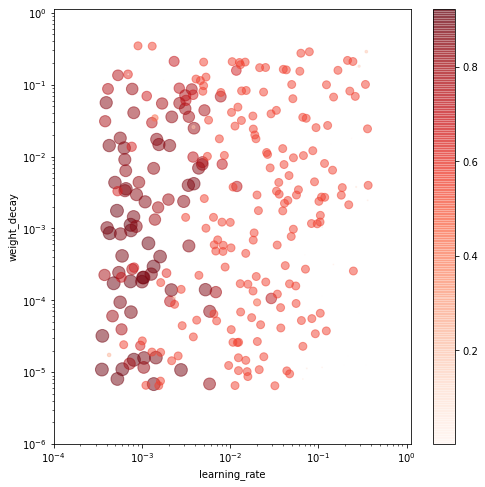

In [16]:
def j(values):
    return values# + (np.random.rand(values.shape[0])-.5)*(values.std()*.3)


fig,ax = plt.subplots(figsize=(8,8))
sc = ax.scatter(x=j(df["config/learning_rate"]),y=j(df["config/weight_decay"]),s=df["accuracy"]**2*200,c=df["accuracy"], alpha=.5,cmap="Reds")
plt.colorbar(sc)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4,None)
ax.set_ylim(1e-6,None)
ax.set_xlabel("learning_rate")
ax.set_ylabel("weight_decay")

Text(0, 0.5, 'n_layers')

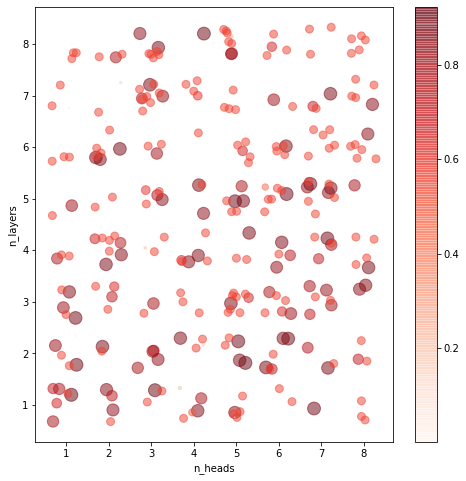

In [17]:
df = transformer_tum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# jitter
def j(values):
    return values + (np.random.rand(values.shape[0])-.5)*(values.std()*.3)

fig,ax = plt.subplots(figsize=(8,8))
sc = ax.scatter(x=j(df["config/n_heads"]),y=j(df["config/n_layers"]),s=df["accuracy"]**2*200,c=df["accuracy"], alpha=.5,cmap="Reds")
plt.colorbar(sc)
ax.set_xlabel("n_heads")
ax.set_ylabel("n_layers")


Text(0, 0.5, 'num_layers')

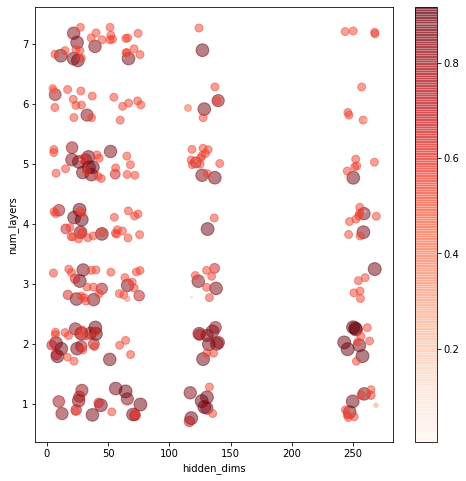

In [18]:
df = rnn_tum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# jitter
def j(values):
    return values + (np.random.rand(values.shape[0])-.5)*(values.std()*.3)

fig,ax = plt.subplots(figsize=(8,8))
sc = ax.scatter(x=j(df["config/hidden_dims"]),y=j(df["config/num_layers"]),s=df["accuracy"]**2*200,c=df["accuracy"], alpha=.5,cmap="Reds")
plt.colorbar(sc)
ax.set_xlabel("hidden_dims")
ax.set_ylabel("num_layers")


Text(0, 0.5, 'rank')

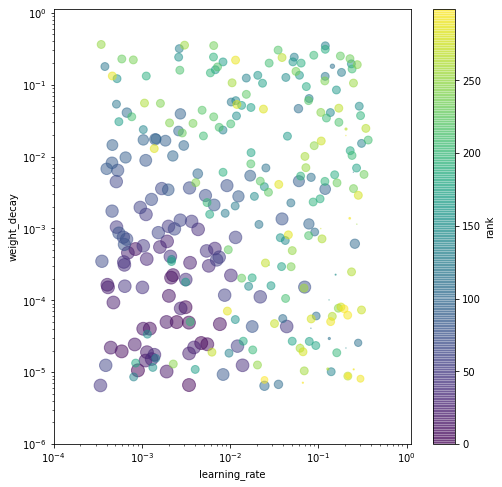

In [19]:
df = rnn_tum.reset_index().reset_index()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# jitter
def j(values):
    return values# + (np.random.rand(values.shape[0])-.5)*(values.std()*.1)

fig,ax = plt.subplots(figsize=(8,8))
sc = ax.scatter(x=j(df["config/learning_rate"]),y=j(df["config/weight_decay"]),s=df["accuracy"]**2*200,
                c=df["index"], alpha=.5,cmap="viridis")
cbar = plt.colorbar(sc)
ax.set_xlabel("learning_rate")
ax.set_ylabel("weight_decay")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4,None)
ax.set_ylim(1e-6,None)
cbar.ax.set_ylabel('rank')

(1e-06, 1.1220184543019633)

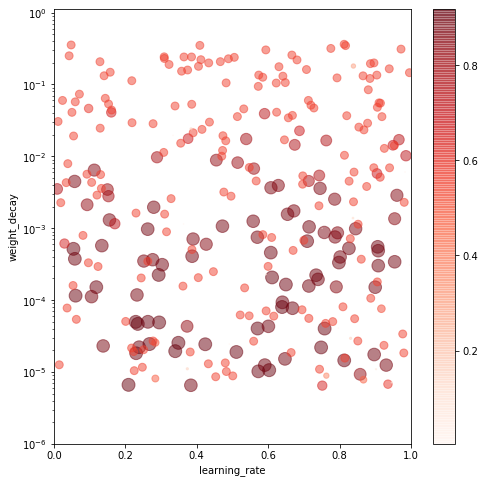

In [20]:
df = rnn_tum
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# jitter
def j(values):
    return values# + (np.random.rand(values.shape[0])-.5)*(values.std()*.1)

fig,ax = plt.subplots(figsize=(8,8))
sc = ax.scatter(x=j(df["config/dropout"]),y=j(df["config/weight_decay"]),s=df["accuracy"]**2*200,c=df["accuracy"], alpha=.5,cmap="Reds")
plt.colorbar(sc)
ax.set_xlabel("learning_rate")
ax.set_ylabel("weight_decay")

#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0,1)
ax.set_ylim(1e-6,None)